In [31]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [32]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [33]:
pl.style.use('fabiostyle')

# needs to find the library of functions
sys.path.append('../../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [34]:
NOTEBOOK_NAME = 'decoding_all_sessions_sh_rw'

In [35]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [36]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [37]:
all_animals = 'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m6', 'c10m8', '90', '91', '92', '93'
pre_animals = 'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m6', 'c10m8', '90', '91', '92', '93'
post_animals = 'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m6', 'c10m8', '90', '91', '92', '93'
pre_rev_animals = 'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m6', 'c10m8', '90', '91'
post_rev_animals = 'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m6', 'c10m8', '90', '91', '92', '93'

epochs = '', '_early', '_mid', '_late'
sessions = 'pre','post','pre_rev','post_rev',

In [38]:
for var in ('scores', 'n_train', 'n_test', 'patterns_evs', 'labels', 'lick_dis', 'lick_scores'):
    exec("vars_ts_pre_%s = {}"%var)
    for ani in pre_animals:
        exec("vars_ts_pre_%s.update({ani: ut.load_variable(var,\
              '../%s/3odor_pre/notebooks/autorestore/decoding_through_session/')})"%(var, ani))
        
for var in ('scores', 'n_train', 'n_test', 'patterns_evs', 'labels', 'lick_dis', 'lick_scores'):
    exec("vars_ts_post_%s = {}"%var)
    for ani in post_animals:
        exec("vars_ts_post_%s.update({ani: ut.load_variable(var,\
              '../%s/3odor_post/notebooks/autorestore/decoding_through_session/')})"%(var, ani))
        
for var in ('scores', 'n_train', 'n_test', 'patterns_evs', 'labels', 'lick_dis', 'lick_scores'):
    exec("vars_ts_pre_rev_%s = {}"%var)
    for ani in pre_rev_animals:
        exec("vars_ts_pre_rev_%s.update({ani: ut.load_variable(var,\
              '../%s/3odor_pre_rev/notebooks/autorestore/decoding_through_session/')})"%(var, ani))
        
for var in ('scores', 'n_train', 'n_test', 'patterns_evs', 'labels', 'lick_dis', 'lick_scores'):
    exec("vars_ts_post_rev_%s = {}"%var)
    for ani in post_rev_animals:
        exec("vars_ts_post_rev_%s.update({ani: ut.load_variable(var,\
              '../%s/3odor_post_rev/notebooks/autorestore/decoding_through_session/')})"%(var, ani))
        

In [39]:
sessions = '3odor_pre','3odor_post','3odor_pre_rev','3odor_post_rev',
sess_without = 'pre','post','pre_rev','post_rev'
for i in range(len(sessions)):
    for e in epochs:
        exec('perf_%s%s = {}'% (sess_without[i],e))
        for ani in eval('%s_animals'%sess_without[i]):
             eval('perf_%s%s.update'%(sess_without[i],e))({ani: ut.load_variable('scores%s'%e,
                                             '../%s/%s/notebooks/autorestore/decoding_odors_sh_rw/'%(ani,sessions[i]))})

#the code above replaces all of the below!
                
# perf_pre = {}
# for ani in pre_animals:
#     perf_pre.update({ani: ut.load_variable('scores',
#                                              '../%s/pre/notebooks/autorestore/decoding_odors/'%ani)})
# perf_post = {}
# for ani in post_animals:
#     perf_post.update({ani: ut.load_variable('scores',
#                                              '../%s/post/notebooks/autorestore/decoding_odors/'%ani)})
# perf_ext1 = {}
# for ani in ext1_animals:
#     perf_ext1.update({ani: ut.load_variable('scores',
#                                              '../%s/ext1/notebooks/autorestore/decoding_odors/'%ani)})    
# perf_ext2 = {}
# for ani in ext2_animals:
#     perf_ext2.update({ani: ut.load_variable('scores',
#                                              '../%s/ext2/notebooks/autorestore/decoding_odors/'%ani)})
# perf_renew = {}
# for ani in renew_animals:
#     perf_renew.update({ani: ut.load_variable('scores',
#                                              '../%s/renew/notebooks/autorestore/decoding_odors/'%ani)})
# perf_pre_early = {}
# for ani in pre_animals:
#     perf_pre_early.update({ani: ut.load_variable('scores_early',
#                                              '../%s/pre/notebooks/autorestore/decoding_odors/'%ani)})
# perf_pre_mid = {}
# for ani in pre_animals:
#     perf_pre_mid.update({ani: ut.load_variable('scores_mid',
#                                              '../%s/pre/notebooks/autorestore/decoding_odors/'%ani)})
# perf_pre_late = {}
# for ani in pre_animals:
#     perf_pre_late.update({ani: ut.load_variable('scores_late',
#                                              '../%s/pre/notebooks/autorestore/decoding_odors/'%ani)})

# perf_post_early = {}
# for ani in post_animals:
#     perf_post_early.update({ani: ut.load_variable('scores_early',
#                                              '../%s/post/notebooks/autorestore/decoding_odors/'%ani)})
# perf_post_mid = {}
# for ani in post_animals:
#     perf_post_mid.update({ani: ut.load_variable('scores_mid',
#                                              '../%s/post/notebooks/autorestore/decoding_odors/'%ani)})
# perf_post_late = {}
# for ani in post_animals:
#     perf_post_late.update({ani: ut.load_variable('scores_late',
#                                           '../%s/post/notebooks/autorestore/decoding_odors/'%ani)})
# perf_ext1_early = {}
# for ani in ext1_animals:
#     perf_ext1_early.update({ani: ut.load_variable('scores_early',
#                                              '../%s/ext1/notebooks/autorestore/decoding_odors/'%ani)})
# perf_ext1_mid = {}
# for ani in ext1_animals:
#     perf_ext1_mid.update({ani: ut.load_variable('scores_mid',
#                                              '../%s/ext1/notebooks/autorestore/decoding_odors/'%ani)})
# perf_ext1_late = {}
# for ani in ext1_animals:
#     perf_ext1_late.update({ani: ut.load_variable('scores_late',
#                                              '../%s/ext1/notebooks/autorestore/decoding_odors/'%ani)})
# perf_ext2_early = {}
# for ani in ext2_animals:
#     perf_ext2_early.update({ani: ut.load_variable('scores_early',
#                                              '../%s/ext2/notebooks/autorestore/decoding_odors/'%ani)})
# perf_ext2_mid = {}
# for ani in ext2_animals:
#     perf_ext2_mid.update({ani: ut.load_variable('scores_mid',
#                                              '../%s/ext2/notebooks/autorestore/decoding_odors/'%ani)})
# perf_ext2_late = {}
# for ani in ext2_animals:
#     perf_ext2_late.update({ani: ut.load_variable('scores_late',
#                                              '../%s/ext2/notebooks/autorestore/decoding_odors/'%ani)})
# perf_renew_early = {}
# for ani in renew_animals:
#     perf_renew_early.update({ani: ut.load_variable('scores_early',
#                                              '../%s/renew/notebooks/autorestore/decoding_odors/'%ani)})
# perf_renew_mid = {}
# for ani in renew_animals:
#     perf_renew_mid.update({ani: ut.load_variable('scores_mid',
#                                              '../%s/renew/notebooks/autorestore/decoding_odors/'%ani)})
# perf_renew_late = {}
# for ani in renew_animals:
#     perf_renew_late.update({ani: ut.load_variable('scores_late',
#                                              '../%s/renew/notebooks/autorestore/decoding_odors/'%ani)})    

In [40]:
sessions = '3odor_pre','3odor_post','3odor_pre_rev','3odor_post_rev',
sess_without = 'pre','post','pre_rev','post_rev'
for i in range(len(sessions)):
    for e in epochs:

        exec('perf_%s_cs_and_trace%s = {}'% (sess_without[i],e))
        for ani in eval('%s_animals'%sess_without[i]):
             eval('perf_%s_cs_and_trace%s.update'%(sess_without[i],e))({ani: ut.load_variable('scores%s'%e,
                                             '../%s/%s/notebooks/autorestore/decoding_odors_cs_and_trace_sh_rw/'%(ani,sessions[i]))})

In [41]:
sessions = '3odor_pre','3odor_post','3odor_pre_rev','3odor_post_rev',
sess_without = 'pre','post','pre_rev','post_rev'
for i in range(len(sessions)):
    for e in epochs:

        exec('perf_%s_only_trace%s = {}'% (sess_without[i],e))
        for ani in eval('%s_animals'%sess_without[i]):
             eval('perf_%s_only_trace%s.update'%(sess_without[i],e))({ani: ut.load_variable('scores%s'%e,
                                             '../%s/%s/notebooks/autorestore/decoding_odors_only_trace_sh_rw/'%(ani,sessions[i]))})

In [42]:
def plot_1(ax, values, animals, color='k', chance=100./2):
    pt.plot_bars(np.r_[values]*100, ax=ax, colors=color, stderr=True)
    ax.hlines(chance, -1.2, len(animals)+.2, linestyles='dotted', lw=1)
#     ax.set_xticks(range(len(animals)))
#     ax.set_xticklabels(animals, fontsize=5, rotation=30)
    
    return ax, [pt.add_significance(ax, v*100, chance, i, i, 105, sig_func=sstats.ttest_1samp, ticksize=0)
                for i, v in enumerate(values)]

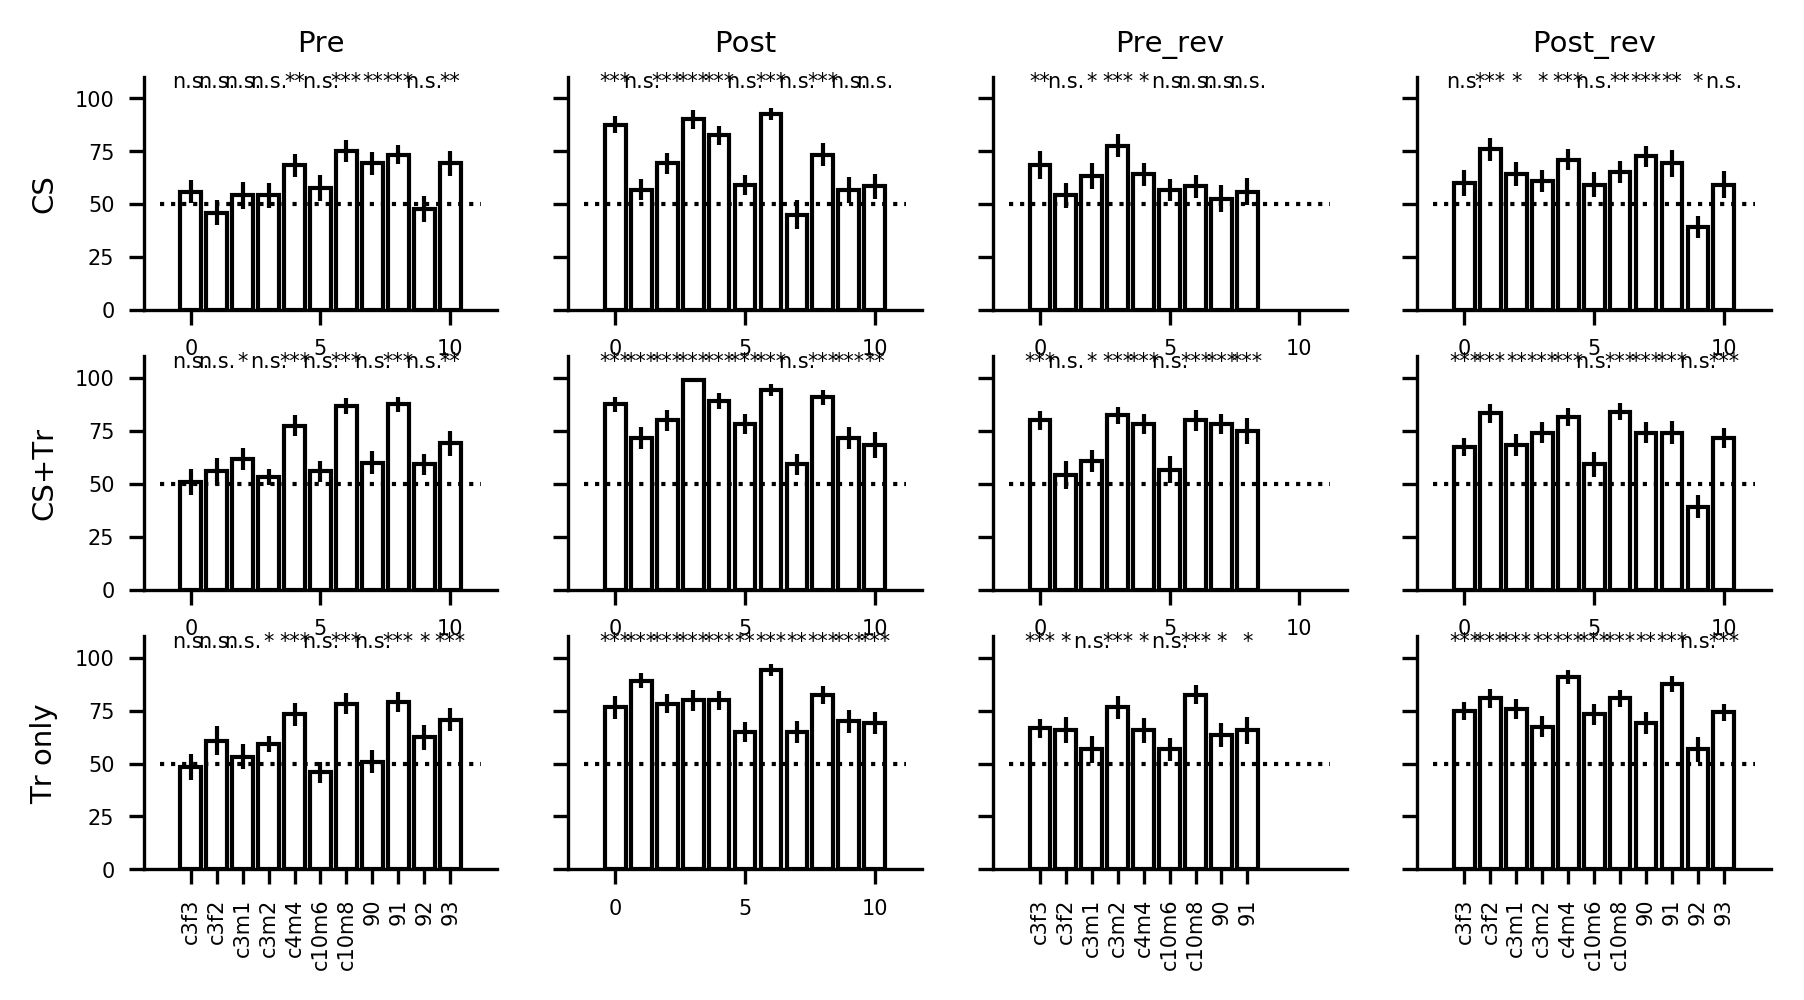

In [43]:
fig, axs = pl.subplots(3, 4, figsize=(7, 3.5), sharey=True, sharex=False)


pvs = []
pvs.append(plot_1(axs[0][0], [perf_pre[m] for m in all_animals
                      if m in perf_pre.keys()], all_animals, color='k')[1])
pvs.append(plot_1(axs[0][1], [perf_post[m] for m in all_animals
                      if m in perf_post.keys()], all_animals, color='k')[1])
pvs.append(plot_1(axs[0][2], [perf_pre_rev[m] for m in all_animals
                      if m in perf_pre_rev.keys()], all_animals, color='k')[1])
pvs.append(plot_1(axs[0][3], [perf_post_rev[m] for m in all_animals
                      if m in perf_post_rev.keys()], all_animals, color='k')[1])
pvs.append(plot_1(axs[1][0], [perf_pre_cs_and_trace[m] for m in all_animals
                      if m in perf_pre_cs_and_trace.keys()], all_animals, color='k')[1])
pvs.append(plot_1(axs[1][1], [perf_post_cs_and_trace[m] for m in all_animals
                      if m in perf_post_cs_and_trace.keys()], all_animals, color='k')[1])
pvs.append(plot_1(axs[1][2], [perf_pre_rev_cs_and_trace[m] for m in all_animals
                      if m in perf_pre_rev_cs_and_trace.keys()], all_animals, color='k')[1])
pvs.append(plot_1(axs[1][3], [perf_post_rev_cs_and_trace[m] for m in all_animals
                      if m in perf_post_rev_cs_and_trace.keys()], all_animals, color='k')[1])
pvs.append(plot_1(axs[2][0], [perf_pre_only_trace[m] for m in all_animals
                      if m in perf_pre_only_trace.keys()], all_animals, color='k')[1])
pvs.append(plot_1(axs[2][1], [perf_post_only_trace[m] for m in all_animals
                      if m in perf_post_only_trace.keys()], all_animals, color='k')[1])
pvs.append(plot_1(axs[2][2], [perf_pre_rev_only_trace[m] for m in all_animals
                      if m in perf_pre_rev_only_trace.keys()], all_animals, color='k')[1])
pvs.append(plot_1(axs[2][3], [perf_post_rev_only_trace[m] for m in all_animals
                      if m in perf_post_rev_only_trace.keys()], all_animals, color='k')[1])

for ax in axs.flatten():
    pt.nicer_plot(ax)
    
axs[0][0].set_title('Pre')
axs[0][1].set_title('Post')
axs[0][2].set_title('Pre_rev')
axs[0][3].set_title('Post_rev')

#for ax in axs[-1]:
#    ax.set_xticks(range(len(all_animals)))
#    ax.set_xticklabels(all_animals, fontsize=5, rotation=90)
axs[-1][-1].set_xticks(range(len(post_rev_animals)))
axs[-1][-1].set_xticklabels(post_rev_animals, fontsize=5, rotation=90)
axs[-1][-2].set_xticks(range(len(pre_rev_animals)))
axs[-1][-2].set_xticklabels(pre_rev_animals, fontsize=5, rotation=90)
axs[-1][-4].set_xticks(range(len(post_animals)))
axs[-1][-4].set_xticklabels(post_animals, fontsize=5, rotation=90)
axs[-1][-4].set_xticks(range(len(pre_animals)))
axs[-1][-4].set_xticklabels(pre_animals, fontsize=5, rotation=90)
   
axs[0][0].set_ylabel('CS')
axs[1][0].set_ylabel('CS+Tr')
axs[2][0].set_ylabel('Tr only')

fig.savefig('../img/decoding.pdf')
np.savetxt('../img/decoding.pvs', np.concatenate(pvs), header='T-test one sample')

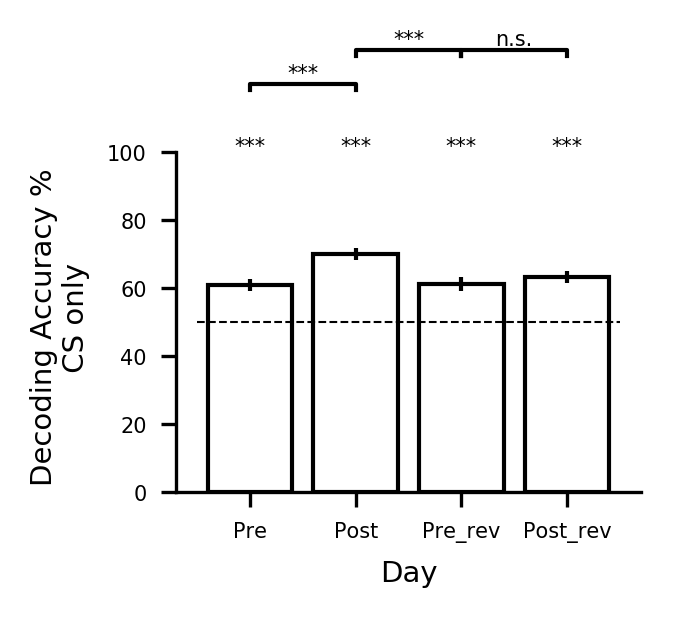

In [44]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1.5), sharey=True)

values = [np.concatenate([perf_pre[m] for m in all_animals if m in perf_pre.keys()])*100,
          np.concatenate([perf_post[m] for m in all_animals if m in perf_post.keys()])*100,
          np.concatenate([perf_pre_rev[m] for m in all_animals if m in perf_pre_rev.keys()])*100,
          np.concatenate([perf_post_rev[m] for m in all_animals if m in perf_post_rev.keys()])*100,
          ]
pt.plot_bars(values, xpos=[0, 1, 2,3], ax=ax, stderr=True)
# pl.plot(np.random.rand(len(values[0]))*0.1, values[0], 'o', mew=0., mfc='k', alpha=0.2, ms=2)
# pl.plot(np.random.rand(len(values[1]))*0.1+1, values[1], 'o', mew=0., mfc='k', alpha=0.2, ms=2)
# pl.plot(np.random.rand(len(values[2]))*0.1+2, values[2], 'o', mew=0., mfc='k', alpha=0.2, ms=2)


# fig.text(0.5, 1, 'Same Session', fontsize=7, ha='center')
pvs = []
pvs.append(pt.add_significance(ax, values[0], 50, 0, 0, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[1], 50, 1, 1, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[2], 50, 2, 2, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[3], 50, 3, 3, 100, sig_func=sstats.ttest_1samp, ticksize=0))

pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 120))
pvs.append(pt.add_significance(ax, values[1], values[2], 1, 2, 130))
pvs.append(pt.add_significance(ax, values[2], values[3], 2, 3, 130))
# fig.savefig('../img/decoding_prepost__same_session.pdf')
# for p, what in zip(ps, ['pre_ctrl', 'pre_shock', 'post_ctrl', 'post_shock']):
#     np.savetxt('../img/decoding_prepost__same_session_%s.pvs'%what, p, header='Ttest 1 samp, n=30')

pt.nicer_plot(ax)

ax.set_ylabel('Decoding Accuracy % \n CS only')
ax.set_xticks(range(4))
ax.set_xticklabels(['Pre', 'Post', 'Pre_rev','Post_rev',])
ax.set_xlabel('Day')

ax.hlines(50, -0.5, 3.5, linestyles='dashed', lw=0.5, color='k', zorder=0)

ax.set_ylim(0, 100)

fig.savefig('../img/decoding_all_sess__same_session_allmice_combined.pdf')
np.savetxt('../img/decoding_all_sess__same_session_allmice_combined.pvs', pvs,
           header='T-test one sample')
# print pvs

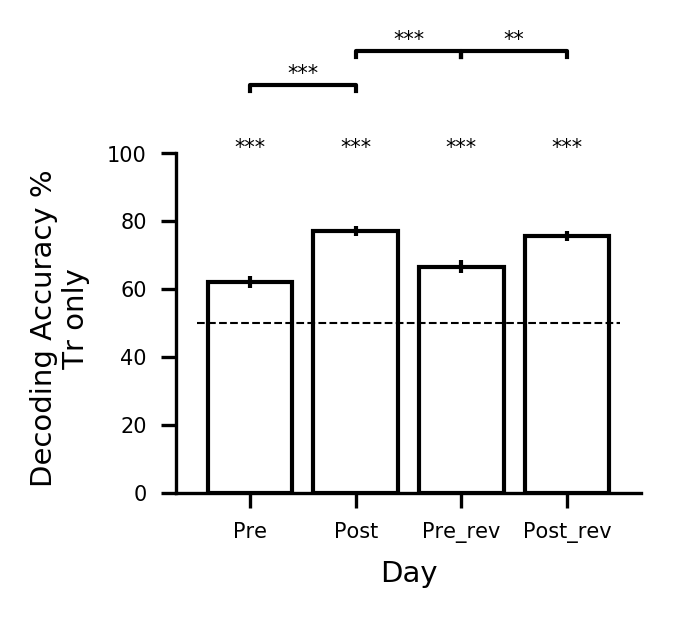

In [45]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1.5), sharey=True)

values = [np.concatenate([perf_pre_only_trace[m] for m in all_animals if m in perf_pre_only_trace.keys()])*100,
          np.concatenate([perf_post_only_trace[m] for m in all_animals if m in perf_post_only_trace.keys()])*100,
          np.concatenate([perf_pre_rev_only_trace[m] for m in all_animals if m in perf_pre_rev_only_trace.keys()])*100,
          np.concatenate([perf_post_rev_only_trace[m] for m in all_animals if m in perf_post_rev_only_trace.keys()])*100,
          ]
pt.plot_bars(values, xpos=[0, 1, 2,3], ax=ax, stderr=True)
# pl.plot(np.random.rand(len(values[0]))*0.1, values[0], 'o', mew=0., mfc='k', alpha=0.2, ms=2)
# pl.plot(np.random.rand(len(values[1]))*0.1+1, values[1], 'o', mew=0., mfc='k', alpha=0.2, ms=2)
# pl.plot(np.random.rand(len(values[2]))*0.1+2, values[2], 'o', mew=0., mfc='k', alpha=0.2, ms=2)


# fig.text(0.5, 1, 'Same Session', fontsize=7, ha='center')
pvs = []
pvs.append(pt.add_significance(ax, values[0], 50, 0, 0, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[1], 50, 1, 1, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[2], 50, 2, 2, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[3], 50, 3, 3, 100, sig_func=sstats.ttest_1samp, ticksize=0))

pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 120))
pvs.append(pt.add_significance(ax, values[1], values[2], 1, 2, 130))
pvs.append(pt.add_significance(ax, values[2], values[3], 2, 3, 130))
# fig.savefig('../img/decoding_prepost__same_session.pdf')
# for p, what in zip(ps, ['pre_ctrl', 'pre_shock', 'post_ctrl', 'post_shock']):
#     np.savetxt('../img/decoding_prepost__same_session_%s.pvs'%what, p, header='Ttest 1 samp, n=30')

pt.nicer_plot(ax)

ax.set_ylabel('Decoding Accuracy % \n Tr only')
ax.set_xticks(range(4))
ax.set_xticklabels(['Pre', 'Post', 'Pre_rev','Post_rev',])
ax.set_xlabel('Day')

ax.hlines(50, -0.5, 3.5, linestyles='dashed', lw=0.5, color='k', zorder=0)

ax.set_ylim(0, 100)

fig.savefig('../img/decoding_all_sess__same_session_allmice_combined.pdf')
np.savetxt('../img/decoding_all_sess__same_session_allmice_combined.pvs', pvs,
           header='T-test one sample')
# print pvs

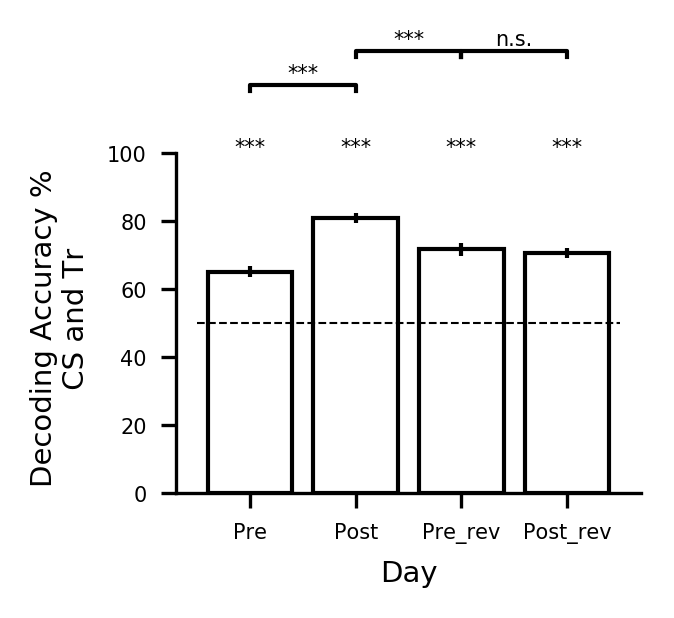

In [46]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1.5), sharey=True)

values = [np.concatenate([perf_pre_cs_and_trace[m] for m in all_animals if m in perf_pre_cs_and_trace.keys()])*100,
          np.concatenate([perf_post_cs_and_trace[m] for m in all_animals if m in perf_post_cs_and_trace.keys()])*100,
          np.concatenate([perf_pre_rev_cs_and_trace[m] for m in all_animals if m in perf_pre_rev_cs_and_trace.keys()])*100,
          np.concatenate([perf_post_rev_cs_and_trace[m] for m in all_animals if m in perf_post_rev_cs_and_trace.keys()])*100,
          ]
pt.plot_bars(values, xpos=[0, 1, 2,3], ax=ax, stderr=True)
# pl.plot(np.random.rand(len(values[0]))*0.1, values[0], 'o', mew=0., mfc='k', alpha=0.2, ms=2)
# pl.plot(np.random.rand(len(values[1]))*0.1+1, values[1], 'o', mew=0., mfc='k', alpha=0.2, ms=2)
# pl.plot(np.random.rand(len(values[2]))*0.1+2, values[2], 'o', mew=0., mfc='k', alpha=0.2, ms=2)


# fig.text(0.5, 1, 'Same Session', fontsize=7, ha='center')
pvs = []
pvs.append(pt.add_significance(ax, values[0], 50, 0, 0, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[1], 50, 1, 1, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[2], 50, 2, 2, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[3], 50, 3, 3, 100, sig_func=sstats.ttest_1samp, ticksize=0))

pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 120))
pvs.append(pt.add_significance(ax, values[1], values[2], 1, 2, 130))
pvs.append(pt.add_significance(ax, values[2], values[3], 2, 3, 130))
# fig.savefig('../img/decoding_prepost__same_session.pdf')
# for p, what in zip(ps, ['pre_ctrl', 'pre_shock', 'post_ctrl', 'post_shock']):
#     np.savetxt('../img/decoding_prepost__same_session_%s.pvs'%what, p, header='Ttest 1 samp, n=30')

pt.nicer_plot(ax)

ax.set_ylabel('Decoding Accuracy % \n CS and Tr')
ax.set_xticks(range(4))
ax.set_xticklabels(['Pre', 'Post', 'Pre_rev','Post_rev',])
ax.set_xlabel('Day')

ax.hlines(50, -0.5, 3.5, linestyles='dashed', lw=0.5, color='k', zorder=0)

ax.set_ylim(0, 100)

fig.savefig('../img/decoding_all_sess__same_session_allmice_combined.pdf')
np.savetxt('../img/decoding_all_sess__same_session_allmice_combined.pvs', pvs,
           header='T-test one sample')
# print pvs

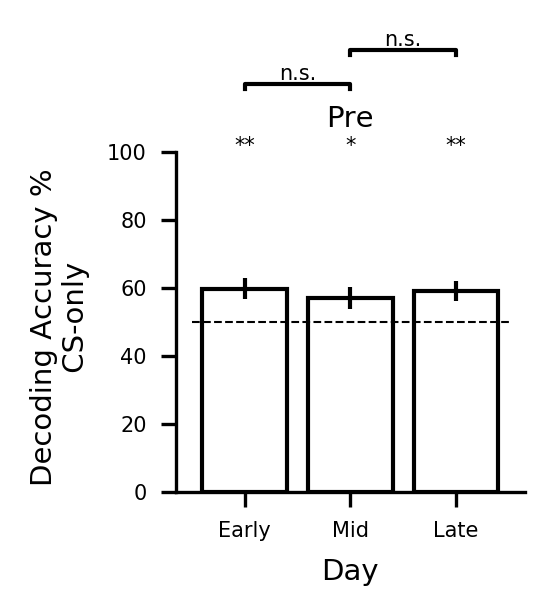

In [47]:
fig, ax = pl.subplots(1, 1, figsize=(1.5, 1.5), sharey=True)

values = [np.concatenate([perf_pre_early[m] for m in all_animals if m in perf_pre_early.keys()])*100,
          np.concatenate([perf_pre_mid[m] for m in all_animals if m in perf_pre_mid.keys()])*100,
          np.concatenate([perf_pre_late[m] for m in all_animals if m in perf_pre_late.keys()])*100]
pt.plot_bars(values, xpos=[0, 1, 2], ax=ax, stderr=True)
# pl.plot(np.random.rand(len(values[0]))*0.1, values[0], 'o', mew=0., mfc='k', alpha=0.2, ms=2)
# pl.plot(np.random.rand(len(values[1]))*0.1+1, values[1], 'o', mew=0., mfc='k', alpha=0.2, ms=2)
# pl.plot(np.random.rand(len(values[2]))*0.1+2, values[2], 'o', mew=0., mfc='k', alpha=0.2, ms=2)


# fig.text(0.5, 1, 'Same Session', fontsize=7, ha='center')
pvs = []
pvs.append(pt.add_significance(ax, values[0], 50, 0, 0, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[1], 50, 1, 1, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[2], 50, 2, 2, 100, sig_func=sstats.ttest_1samp, ticksize=0))

pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 120))
pvs.append(pt.add_significance(ax, values[1], values[2], 1, 2, 130))
# fig.savefig('../img/decoding_prepost__same_session.pdf')
# for p, what in zip(ps, ['pre_ctrl', 'pre_shock', 'post_ctrl', 'post_shock']):
#     np.savetxt('../img/decoding_prepost__same_session_%s.pvs'%what, p, header='Ttest 1 samp, n=30')

pt.nicer_plot(ax)

ax.set_ylabel('Decoding Accuracy % \n CS-only')
ax.set_xticks(range(3))
ax.set_xticklabels(['Early', 'Mid', 'Late'])
ax.set_xlabel('Day')

ax.hlines(50, -0.5, 2.5, linestyles='dashed', lw=0.5, color='k', zorder=0)

ax.set_ylim(0, 100)

ax.set_title('Pre')

fig.savefig('../img/decoding_pre_post_pre__same_session_allmice_combined_pre.pdf')
np.savetxt('../img/decoding_pre_post_pre__same_session_allmice_combined_pre.pvs', pvs,
           header='Ttest one sample')
# print pvs

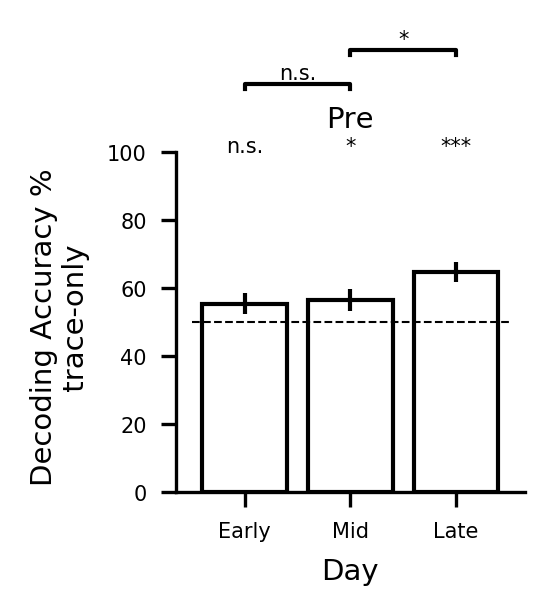

In [48]:
fig, ax = pl.subplots(1, 1, figsize=(1.5, 1.5), sharey=True)

values = [np.concatenate([perf_pre_only_trace_early[m] for m in all_animals if m in perf_pre_only_trace_early.keys()])*100,
          np.concatenate([perf_pre_only_trace_mid[m] for m in all_animals if m in perf_pre_only_trace_mid.keys()])*100,
          np.concatenate([perf_pre_only_trace_late[m] for m in all_animals if m in perf_pre_only_trace_late.keys()])*100]
pt.plot_bars(values, xpos=[0, 1, 2], ax=ax, stderr=True)
# pl.plot(np.random.rand(len(values[0]))*0.1, values[0], 'o', mew=0., mfc='k', alpha=0.2, ms=2)
# pl.plot(np.random.rand(len(values[1]))*0.1+1, values[1], 'o', mew=0., mfc='k', alpha=0.2, ms=2)
# pl.plot(np.random.rand(len(values[2]))*0.1+2, values[2], 'o', mew=0., mfc='k', alpha=0.2, ms=2)


# fig.text(0.5, 1, 'Same Session', fontsize=7, ha='center')
pvs = []
pvs.append(pt.add_significance(ax, values[0], 50, 0, 0, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[1], 50, 1, 1, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[2], 50, 2, 2, 100, sig_func=sstats.ttest_1samp, ticksize=0))

pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 120))
pvs.append(pt.add_significance(ax, values[1], values[2], 1, 2, 130))
# fig.savefig('../img/decoding_prepost__same_session.pdf')
# for p, what in zip(ps, ['pre_ctrl', 'pre_shock', 'post_ctrl', 'post_shock']):
#     np.savetxt('../img/decoding_prepost__same_session_%s.pvs'%what, p, header='Ttest 1 samp, n=30')

pt.nicer_plot(ax)

ax.set_ylabel('Decoding Accuracy % \n trace-only')
ax.set_xticks(range(3))
ax.set_xticklabels(['Early', 'Mid', 'Late'])
ax.set_xlabel('Day')

ax.hlines(50, -0.5, 2.5, linestyles='dashed', lw=0.5, color='k', zorder=0)

ax.set_ylim(0, 100)

ax.set_title('Pre')

fig.savefig('../img/decoding_pre_post_pre__same_session_trace_allmice_combined_pre.pdf')
np.savetxt('../img/decoding_pre_post_pre__same_session_trace_allmice_combined_pre.pvs', pvs,
           header='Ttest one sample')
# print pvs

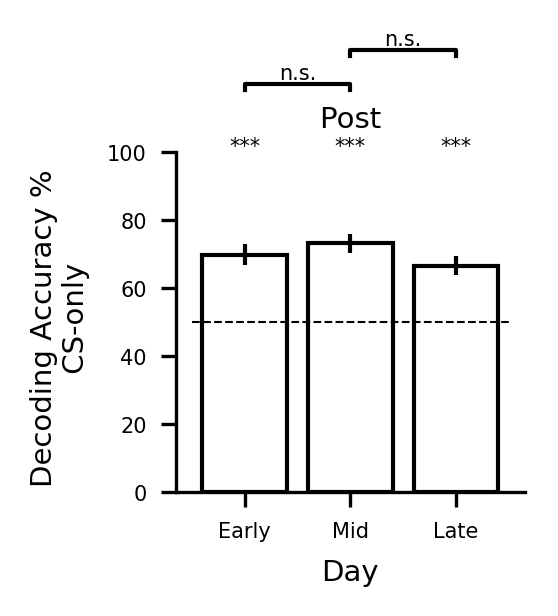

In [49]:
fig, ax = pl.subplots(1, 1, figsize=(1.5, 1.5), sharey=True)

values = [np.concatenate([perf_post_early[m] for m in all_animals if m in perf_post_early.keys()])*100,
          np.concatenate([perf_post_mid[m] for m in all_animals if m in perf_post_mid.keys()])*100,
          np.concatenate([perf_post_late[m] for m in all_animals if m in perf_post_late.keys()])*100]
pt.plot_bars(values, xpos=[0, 1, 2], ax=ax, stderr=True)
# pl.plot(np.random.rand(len(values[0]))*0.1, values[0], 'o', mew=0., mfc='k', alpha=0.2, ms=2)
# pl.plot(np.random.rand(len(values[1]))*0.1+1, values[1], 'o', mew=0., mfc='k', alpha=0.2, ms=2)
# pl.plot(np.random.rand(len(values[2]))*0.1+2, values[2], 'o', mew=0., mfc='k', alpha=0.2, ms=2)


# fig.text(0.5, 1, 'Same Session', fontsize=7, ha='center')
pvs = []
pvs.append(pt.add_significance(ax, values[0], 50, 0, 0, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[1], 50, 1, 1, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[2], 50, 2, 2, 100, sig_func=sstats.ttest_1samp, ticksize=0))

pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 120))
pvs.append(pt.add_significance(ax, values[1], values[2], 1, 2, 130))
# fig.savefig('../img/decoding_prepost__same_session.pdf')
# for p, what in zip(ps, ['pre_ctrl', 'pre_shock', 'post_ctrl', 'post_shock']):
#     np.savetxt('../img/decoding_prepost__same_session_%s.pvs'%what, p, header='Ttest 1 samp, n=30')

pt.nicer_plot(ax)

ax.set_ylabel('Decoding Accuracy % \n CS-only')
ax.set_xticks(range(3))
ax.set_xticklabels(['Early', 'Mid', 'Late'])
ax.set_xlabel('Day')

ax.hlines(50, -0.5, 2.5, linestyles='dashed', lw=0.5, color='k', zorder=0)

ax.set_ylim(0, 100)

ax.set_title('Post')

fig.savefig('../img/decoding_pre_post_post__same_session_allmice_combined_post.pdf')
np.savetxt('../img/decoding_pre_post_post__same_session_allmice_combined_post.pvs', pvs,
           header='Ttest one sample')
# print pvs

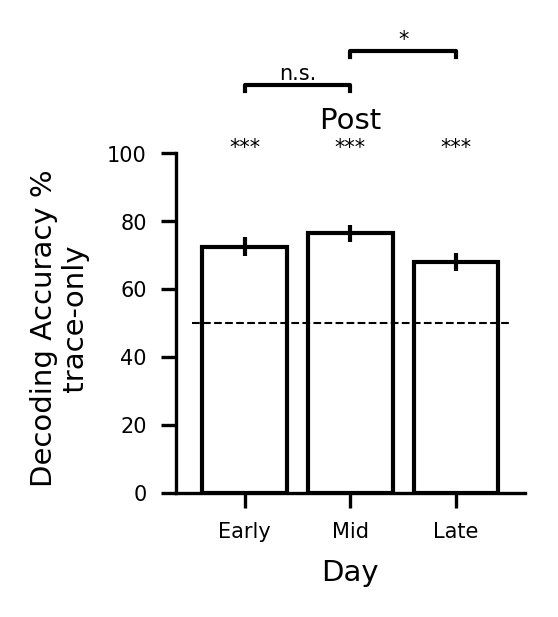

In [50]:
fig, ax = pl.subplots(1, 1, figsize=(1.5, 1.5), sharey=True)

values = [np.concatenate([perf_post_only_trace_early[m] for m in all_animals if m in perf_post_only_trace_early.keys()])*100,
          np.concatenate([perf_post_only_trace_mid[m] for m in all_animals if m in perf_post_only_trace_mid.keys()])*100,
          np.concatenate([perf_post_only_trace_late[m] for m in all_animals if m in perf_post_only_trace_late.keys()])*100]
pt.plot_bars(values, xpos=[0, 1, 2], ax=ax, stderr=True)
# pl.plot(np.random.rand(len(values[0]))*0.1, values[0], 'o', mew=0., mfc='k', alpha=0.2, ms=2)
# pl.plot(np.random.rand(len(values[1]))*0.1+1, values[1], 'o', mew=0., mfc='k', alpha=0.2, ms=2)
# pl.plot(np.random.rand(len(values[2]))*0.1+2, values[2], 'o', mew=0., mfc='k', alpha=0.2, ms=2)


# fig.text(0.5, 1, 'Same Session', fontsize=7, ha='center')
pvs = []
pvs.append(pt.add_significance(ax, values[0], 50, 0, 0, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[1], 50, 1, 1, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[2], 50, 2, 2, 100, sig_func=sstats.ttest_1samp, ticksize=0))

pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 120))
pvs.append(pt.add_significance(ax, values[1], values[2], 1, 2, 130))
# fig.savefig('../img/decoding_prepost__same_session.pdf')
# for p, what in zip(ps, ['pre_ctrl', 'pre_shock', 'post_ctrl', 'post_shock']):
#     np.savetxt('../img/decoding_prepost__same_session_%s.pvs'%what, p, header='Ttest 1 samp, n=30')

pt.nicer_plot(ax)

ax.set_ylabel('Decoding Accuracy % \n trace-only')
ax.set_xticks(range(3))
ax.set_xticklabels(['Early', 'Mid', 'Late'])
ax.set_xlabel('Day')

ax.hlines(50, -0.5, 2.5, linestyles='dashed', lw=0.5, color='k', zorder=0)

ax.set_ylim(0, 100)

ax.set_title('Post')

fig.savefig('../img/decoding_pre_post_post__trace_same_session_allmice_combined_post.pdf')
np.savetxt('../img/decoding_pre_post_post__trace_same_session_allmice_combined_post.pvs', pvs,
           header='Ttest one sample')
# print pvs

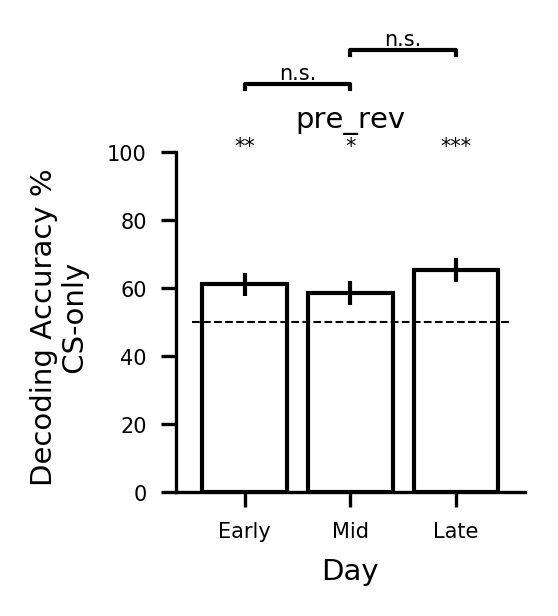

In [51]:
fig, ax = pl.subplots(1, 1, figsize=(1.5, 1.5), sharey=True)

values = [np.concatenate([perf_pre_rev_early[m] for m in all_animals if m in perf_pre_rev_early.keys()])*100,
          np.concatenate([perf_pre_rev_mid[m] for m in all_animals if m in perf_pre_rev_mid.keys()])*100,
          np.concatenate([perf_pre_rev_late[m] for m in all_animals if m in perf_pre_rev_late.keys()])*100]
pt.plot_bars(values, xpos=[0, 1, 2], ax=ax, stderr=True)
# pl.plot(np.random.rand(len(values[0]))*0.1, values[0], 'o', mew=0., mfc='k', alpha=0.2, ms=2)
# pl.plot(np.random.rand(len(values[1]))*0.1+1, values[1], 'o', mew=0., mfc='k', alpha=0.2, ms=2)
# pl.plot(np.random.rand(len(values[2]))*0.1+2, values[2], 'o', mew=0., mfc='k', alpha=0.2, ms=2)


# fig.text(0.5, 1, 'Same Session', fontsize=7, ha='center')
pvs = []
pvs.append(pt.add_significance(ax, values[0], 50, 0, 0, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[1], 50, 1, 1, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[2], 50, 2, 2, 100, sig_func=sstats.ttest_1samp, ticksize=0))

pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 120))
pvs.append(pt.add_significance(ax, values[1], values[2], 1, 2, 130))
# fig.savefig('../img/decoding_prepost__same_session.pdf')
# for p, what in zip(ps, ['pre_ctrl', 'pre_shock', 'post_ctrl', 'post_shock']):
#     np.savetxt('../img/decoding_prepost__same_session_%s.pvs'%what, p, header='Ttest 1 samp, n=30')

pt.nicer_plot(ax)

ax.set_ylabel('Decoding Accuracy % \n CS-only')
ax.set_xticks(range(3))
ax.set_xticklabels(['Early', 'Mid', 'Late'])
ax.set_xlabel('Day')

ax.hlines(50, -0.5, 2.5, linestyles='dashed', lw=0.5, color='k', zorder=0)

ax.set_ylim(0, 100)

ax.set_title('pre_rev')

fig.savefig('../img/decoding_pre_rev__same_session_allmice_combined_pre_rev.pdf')
np.savetxt('../img/decoding_pre_rev__same_session_allmice_combined_pre_rev.pvs', pvs,
           header='Ttest one sample')
# print pvs

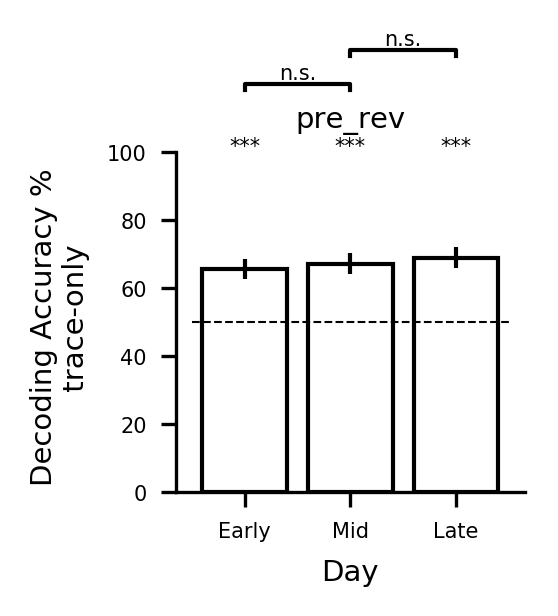

In [52]:
fig, ax = pl.subplots(1, 1, figsize=(1.5, 1.5), sharey=True)

values = [np.concatenate([perf_pre_rev_only_trace_early[m] for m in all_animals if m in perf_pre_rev_only_trace_early.keys()])*100,
          np.concatenate([perf_pre_rev_only_trace_mid[m] for m in all_animals if m in perf_pre_rev_only_trace_mid.keys()])*100,
          np.concatenate([perf_pre_rev_only_trace_late[m] for m in all_animals if m in perf_pre_rev_only_trace_late.keys()])*100]
pt.plot_bars(values, xpos=[0, 1, 2], ax=ax, stderr=True)
# pl.plot(np.random.rand(len(values[0]))*0.1, values[0], 'o', mew=0., mfc='k', alpha=0.2, ms=2)
# pl.plot(np.random.rand(len(values[1]))*0.1+1, values[1], 'o', mew=0., mfc='k', alpha=0.2, ms=2)
# pl.plot(np.random.rand(len(values[2]))*0.1+2, values[2], 'o', mew=0., mfc='k', alpha=0.2, ms=2)


# fig.text(0.5, 1, 'Same Session', fontsize=7, ha='center')
pvs = []
pvs.append(pt.add_significance(ax, values[0], 50, 0, 0, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[1], 50, 1, 1, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[2], 50, 2, 2, 100, sig_func=sstats.ttest_1samp, ticksize=0))

pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 120))
pvs.append(pt.add_significance(ax, values[1], values[2], 1, 2, 130))
# fig.savefig('../img/decoding_prepost__same_session.pdf')
# for p, what in zip(ps, ['pre_ctrl', 'pre_shock', 'post_ctrl', 'post_shock']):
#     np.savetxt('../img/decoding_prepost__same_session_%s.pvs'%what, p, header='Ttest 1 samp, n=30')

pt.nicer_plot(ax)

ax.set_ylabel('Decoding Accuracy % \n trace-only')
ax.set_xticks(range(3))
ax.set_xticklabels(['Early', 'Mid', 'Late'])
ax.set_xlabel('Day')

ax.hlines(50, -0.5, 2.5, linestyles='dashed', lw=0.5, color='k', zorder=0)

ax.set_ylim(0, 100)

ax.set_title('pre_rev')

fig.savefig('../img/decoding_pre_rev__trace_same_session_allmice_combined_pre_rev.pdf')
np.savetxt('../img/decoding_pre_rev__trace_same_session_allmice_combined_pre_rev.pvs', pvs,
           header='Ttest one sample')
# print pvs

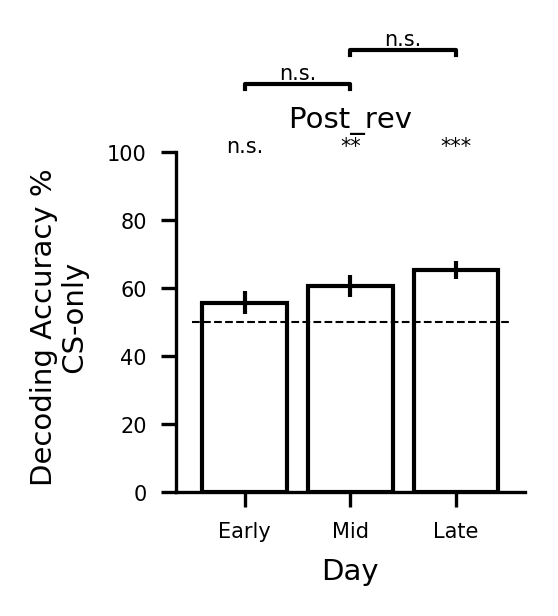

In [53]:
fig, ax = pl.subplots(1, 1, figsize=(1.5, 1.5), sharey=True)

values = [np.concatenate([perf_post_rev_early[m] for m in all_animals if m in perf_post_rev_early.keys()])*100,
          np.concatenate([perf_post_rev_mid[m] for m in all_animals if m in perf_post_rev_mid.keys()])*100,
          np.concatenate([perf_post_rev_late[m] for m in all_animals if m in perf_post_rev_late.keys()])*100]
pt.plot_bars(values, xpos=[0, 1, 2], ax=ax, stderr=True)
# pl.plot(np.random.rand(len(values[0]))*0.1, values[0], 'o', mew=0., mfc='k', alpha=0.2, ms=2)
# pl.plot(np.random.rand(len(values[1]))*0.1+1, values[1], 'o', mew=0., mfc='k', alpha=0.2, ms=2)
# pl.plot(np.random.rand(len(values[2]))*0.1+2, values[2], 'o', mew=0., mfc='k', alpha=0.2, ms=2)


# fig.text(0.5, 1, 'Same Session', fontsize=7, ha='center')
pvs = []
pvs.append(pt.add_significance(ax, values[0], 50, 0, 0, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[1], 50, 1, 1, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[2], 50, 2, 2, 100, sig_func=sstats.ttest_1samp, ticksize=0))

pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 120))
pvs.append(pt.add_significance(ax, values[1], values[2], 1, 2, 130))
# fig.savefig('../img/decoding_prepost__same_session.pdf')
# for p, what in zip(ps, ['pre_ctrl', 'pre_shock', 'post_ctrl', 'post_shock']):
#     np.savetxt('../img/decoding_prepost__same_session_%s.pvs'%what, p, header='Ttest 1 samp, n=30')

pt.nicer_plot(ax)

ax.set_ylabel('Decoding Accuracy % \n CS-only')
ax.set_xticks(range(3))
ax.set_xticklabels(['Early', 'Mid', 'Late'])
ax.set_xlabel('Day')

ax.hlines(50, -0.5, 2.5, linestyles='dashed', lw=0.5, color='k', zorder=0)

ax.set_ylim(0, 100)

ax.set_title('Post_rev')

fig.savefig('../img/decoding_post_rev__same_session_allmice_combined_post_rev.pdf')
np.savetxt('../img/decoding_post_rev__same_session_allmice_combined_post_rev.pvs', pvs,
           header='Ttest one sample')
# print pvs

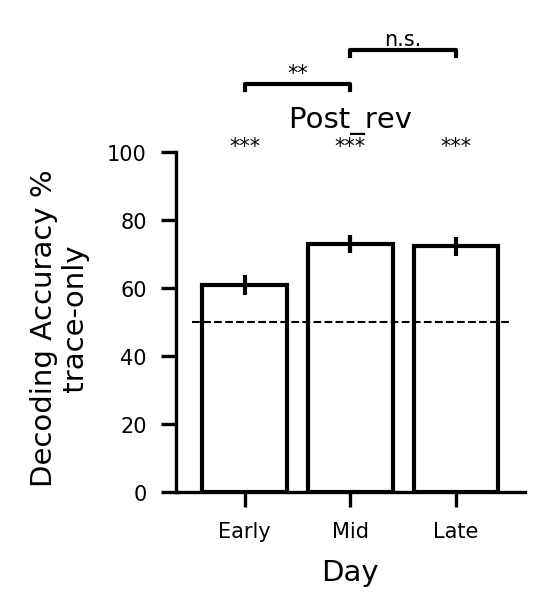

In [54]:
fig, ax = pl.subplots(1, 1, figsize=(1.5, 1.5), sharey=True)

values = [np.concatenate([perf_post_rev_only_trace_early[m] for m in all_animals if m in perf_post_rev_only_trace_early.keys()])*100,
          np.concatenate([perf_post_rev_only_trace_mid[m] for m in all_animals if m in perf_post_rev_only_trace_mid.keys()])*100,
          np.concatenate([perf_post_rev_only_trace_late[m] for m in all_animals if m in perf_post_rev_only_trace_late.keys()])*100]
pt.plot_bars(values, xpos=[0, 1, 2], ax=ax, stderr=True)
# pl.plot(np.random.rand(len(values[0]))*0.1, values[0], 'o', mew=0., mfc='k', alpha=0.2, ms=2)
# pl.plot(np.random.rand(len(values[1]))*0.1+1, values[1], 'o', mew=0., mfc='k', alpha=0.2, ms=2)
# pl.plot(np.random.rand(len(values[2]))*0.1+2, values[2], 'o', mew=0., mfc='k', alpha=0.2, ms=2)


# fig.text(0.5, 1, 'Same Session', fontsize=7, ha='center')
pvs = []
pvs.append(pt.add_significance(ax, values[0], 50, 0, 0, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[1], 50, 1, 1, 100, sig_func=sstats.ttest_1samp, ticksize=0))
pvs.append(pt.add_significance(ax, values[2], 50, 2, 2, 100, sig_func=sstats.ttest_1samp, ticksize=0))

pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 120))
pvs.append(pt.add_significance(ax, values[1], values[2], 1, 2, 130))
# fig.savefig('../img/decoding_prepost__same_session.pdf')
# for p, what in zip(ps, ['pre_ctrl', 'pre_shock', 'post_ctrl', 'post_shock']):
#     np.savetxt('../img/decoding_prepost__same_session_%s.pvs'%what, p, header='Ttest 1 samp, n=30')

pt.nicer_plot(ax)

ax.set_ylabel('Decoding Accuracy % \n trace-only')
ax.set_xticks(range(3))
ax.set_xticklabels(['Early', 'Mid', 'Late'])
ax.set_xlabel('Day')

ax.hlines(50, -0.5, 2.5, linestyles='dashed', lw=0.5, color='k', zorder=0)

ax.set_ylim(0, 100)

ax.set_title('Post_rev')

fig.savefig('../img/decoding_post_rev__trace_same_session_allmice_combined_post_rev.pdf')
np.savetxt('../img/decoding_post_rev__trace_same_session_allmice_combined_post_rev.pvs', pvs,
           header='Ttest one sample')
# print pvs

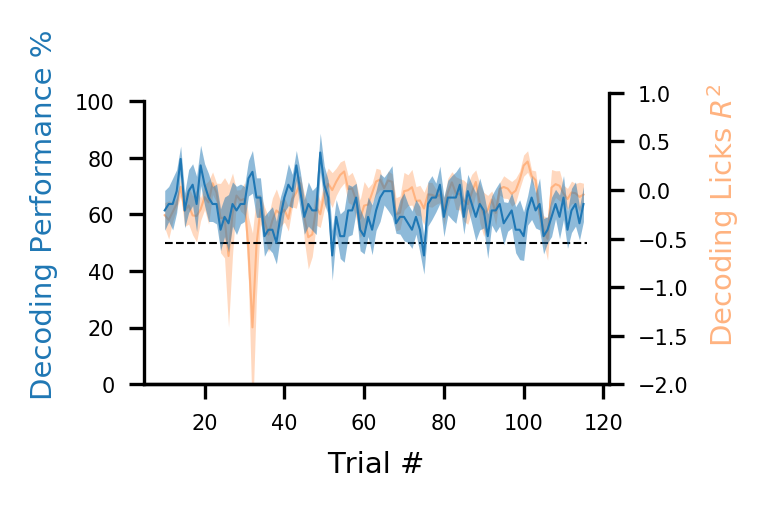

In [55]:
what = 'pre'

fig, ax = pl.subplots(1, 1, figsize=(2, 1.5))
tstart, tstop = (eval("vars_ts_%s_n_train"%what)[all_animals[0]],
                 len(eval("vars_ts_%s_labels"%what)[all_animals[0]])-eval("vars_ts_%s_n_test"%what)[all_animals[0]])

pt.plot_shaded(range(tstart, tstop), np.r_[eval("vars_ts_%s_scores"%what).values()].T*100, ax=ax)
# ax.plot(range(tstart, tstop), scores_m, lw=1, color='k')
# ax.fill_between(range(tstart, tstop), scores_m-scores_s, scores_m+scores_s, lw=0, alpha=0.3, zorder=0, color='k')

ax.set_xlabel('Trial #')
ax.set_ylabel('Decoding Performance %', color='C0')
ax.set_ylim(0, 120)
ax.spines['left'].set_bounds(0, 100)
ax.set_yticks(range(0, 101, 20))
ax.hlines(50, tstart, tstop, linestyles='dashed', color='k', lw=0.5, zorder=0)
ax.set_xlim(0, 120)

ax2 = ax.twinx()
ax2.spines['left'].set_visible(False)
pt.plot_shaded(range(tstart, tstop), np.r_[eval("vars_ts_%s_lick_scores"%what).values()].T, ax=ax2,
               color=(1, 0.7, 0.5))
ax2.spines['right'].set_visible(True)
ax2.set_ylabel('Decoding Licks $R^2$', color=(1, 0.7, 0.5))
ax2.set_ylim(-2, 1.5)
ax2.set_yticks(np.arange(-2, 1.1, 0.5))
ax2.spines['right'].set_bounds(-2, 1)

ax.set_zorder(ax2.get_zorder()+1)
ax.patch.set_visible(False)

fig.savefig('../img/decoding_through_session_%s_allmice.pdf'%what)

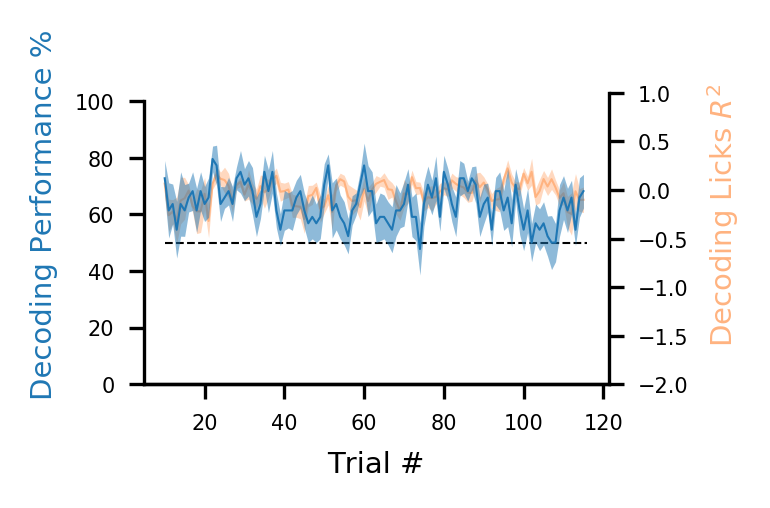

In [56]:
what = 'post'

fig, ax = pl.subplots(1, 1, figsize=(2, 1.5))
tstart, tstop = (eval("vars_ts_%s_n_train"%what)[all_animals[0]],
                 len(eval("vars_ts_%s_labels"%what)[all_animals[0]])-eval("vars_ts_%s_n_test"%what)[all_animals[0]])

pt.plot_shaded(range(tstart, tstop), np.r_[eval("vars_ts_%s_scores"%what).values()].T*100, ax=ax)
# ax.plot(range(tstart, tstop), scores_m, lw=1, color='k')
# ax.fill_between(range(tstart, tstop), scores_m-scores_s, scores_m+scores_s, lw=0, alpha=0.3, zorder=0, color='k')

ax.set_xlabel('Trial #')
ax.set_ylabel('Decoding Performance %', color='C0')
ax.set_ylim(0, 120)
ax.spines['left'].set_bounds(0, 100)
ax.set_yticks(range(0, 101, 20))
ax.hlines(50, tstart, tstop, linestyles='dashed', color='k', lw=0.5, zorder=0)
ax.set_xlim(0, 120)

ax2 = ax.twinx()
ax2.spines['left'].set_visible(False)
pt.plot_shaded(range(tstart, tstop), np.r_[eval("vars_ts_%s_lick_scores"%what).values()].T, ax=ax2,
               color=(1, 0.7, 0.5))
ax2.spines['right'].set_visible(True)
ax2.set_ylabel('Decoding Licks $R^2$', color=(1, 0.7, 0.5))
ax2.set_ylim(-2, 1.5)
ax2.set_yticks(np.arange(-2, 1.1, 0.5))
ax2.spines['right'].set_bounds(-2, 1)

ax.set_zorder(ax2.get_zorder()+1)
ax.patch.set_visible(False)

fig.savefig('../img/decoding_through_session_%s_allmice.pdf'%what)

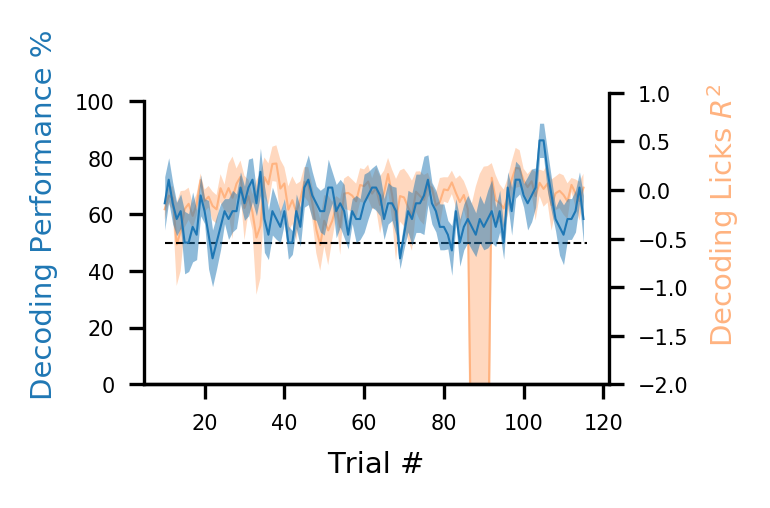

In [57]:
what = 'pre_rev'

fig, ax = pl.subplots(1, 1, figsize=(2, 1.5))
tstart, tstop = (eval("vars_ts_%s_n_train"%what)[all_animals[0]],
                 len(eval("vars_ts_%s_labels"%what)[all_animals[0]])-eval("vars_ts_%s_n_test"%what)[all_animals[0]])

pt.plot_shaded(range(tstart, tstop), np.r_[eval("vars_ts_%s_scores"%what).values()].T*100, ax=ax)
# ax.plot(range(tstart, tstop), scores_m, lw=1, color='k')
# ax.fill_between(range(tstart, tstop), scores_m-scores_s, scores_m+scores_s, lw=0, alpha=0.3, zorder=0, color='k')

ax.set_xlabel('Trial #')
ax.set_ylabel('Decoding Performance %', color='C0')
ax.set_ylim(0, 120)
ax.spines['left'].set_bounds(0, 100)
ax.set_yticks(range(0, 101, 20))
ax.hlines(50, tstart, tstop, linestyles='dashed', color='k', lw=0.5, zorder=0)
ax.set_xlim(0, 120)

ax2 = ax.twinx()
ax2.spines['left'].set_visible(False)
pt.plot_shaded(range(tstart, tstop), np.r_[eval("vars_ts_%s_lick_scores"%what).values()].T, ax=ax2,
               color=(1, 0.7, 0.5))
ax2.spines['right'].set_visible(True)
ax2.set_ylabel('Decoding Licks $R^2$', color=(1, 0.7, 0.5))
ax2.set_ylim(-2, 1.5)
ax2.set_yticks(np.arange(-2, 1.1, 0.5))
ax2.spines['right'].set_bounds(-2, 1)

ax.set_zorder(ax2.get_zorder()+1)
ax.patch.set_visible(False)

fig.savefig('../img/decoding_through_session_%s_allmice.pdf'%what)

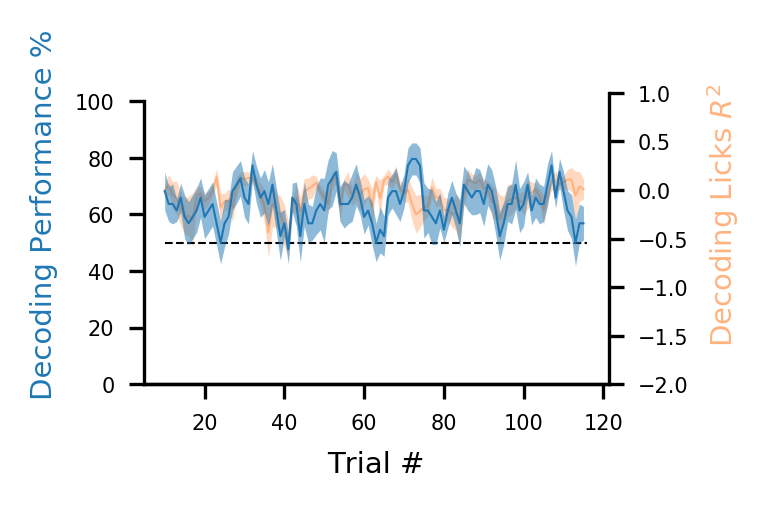

In [58]:
what = 'post_rev'

fig, ax = pl.subplots(1, 1, figsize=(2, 1.5))
tstart, tstop = (eval("vars_ts_%s_n_train"%what)[all_animals[0]],
                 len(eval("vars_ts_%s_labels"%what)[all_animals[0]])-eval("vars_ts_%s_n_test"%what)[all_animals[0]])

pt.plot_shaded(range(tstart, tstop), np.r_[eval("vars_ts_%s_scores"%what).values()].T*100, ax=ax)
# ax.plot(range(tstart, tstop), scores_m, lw=1, color='k')
# ax.fill_between(range(tstart, tstop), scores_m-scores_s, scores_m+scores_s, lw=0, alpha=0.3, zorder=0, color='k')

ax.set_xlabel('Trial #')
ax.set_ylabel('Decoding Performance %', color='C0')
ax.set_ylim(0, 120)
ax.spines['left'].set_bounds(0, 100)
ax.set_yticks(range(0, 101, 20))
ax.hlines(50, tstart, tstop, linestyles='dashed', color='k', lw=0.5, zorder=0)
ax.set_xlim(0, 120)

ax2 = ax.twinx()
ax2.spines['left'].set_visible(False)
pt.plot_shaded(range(tstart, tstop), np.r_[eval("vars_ts_%s_lick_scores"%what).values()].T, ax=ax2,
               color=(1, 0.7, 0.5))
ax2.spines['right'].set_visible(True)
ax2.set_ylabel('Decoding Licks $R^2$', color=(1, 0.7, 0.5))
ax2.set_ylim(-2, 1.5)
ax2.set_yticks(np.arange(-2, 1.1, 0.5))
ax2.spines['right'].set_bounds(-2, 1)

ax.set_zorder(ax2.get_zorder()+1)
ax.patch.set_visible(False)

fig.savefig('../img/decoding_through_session_%s_allmice.pdf'%what)

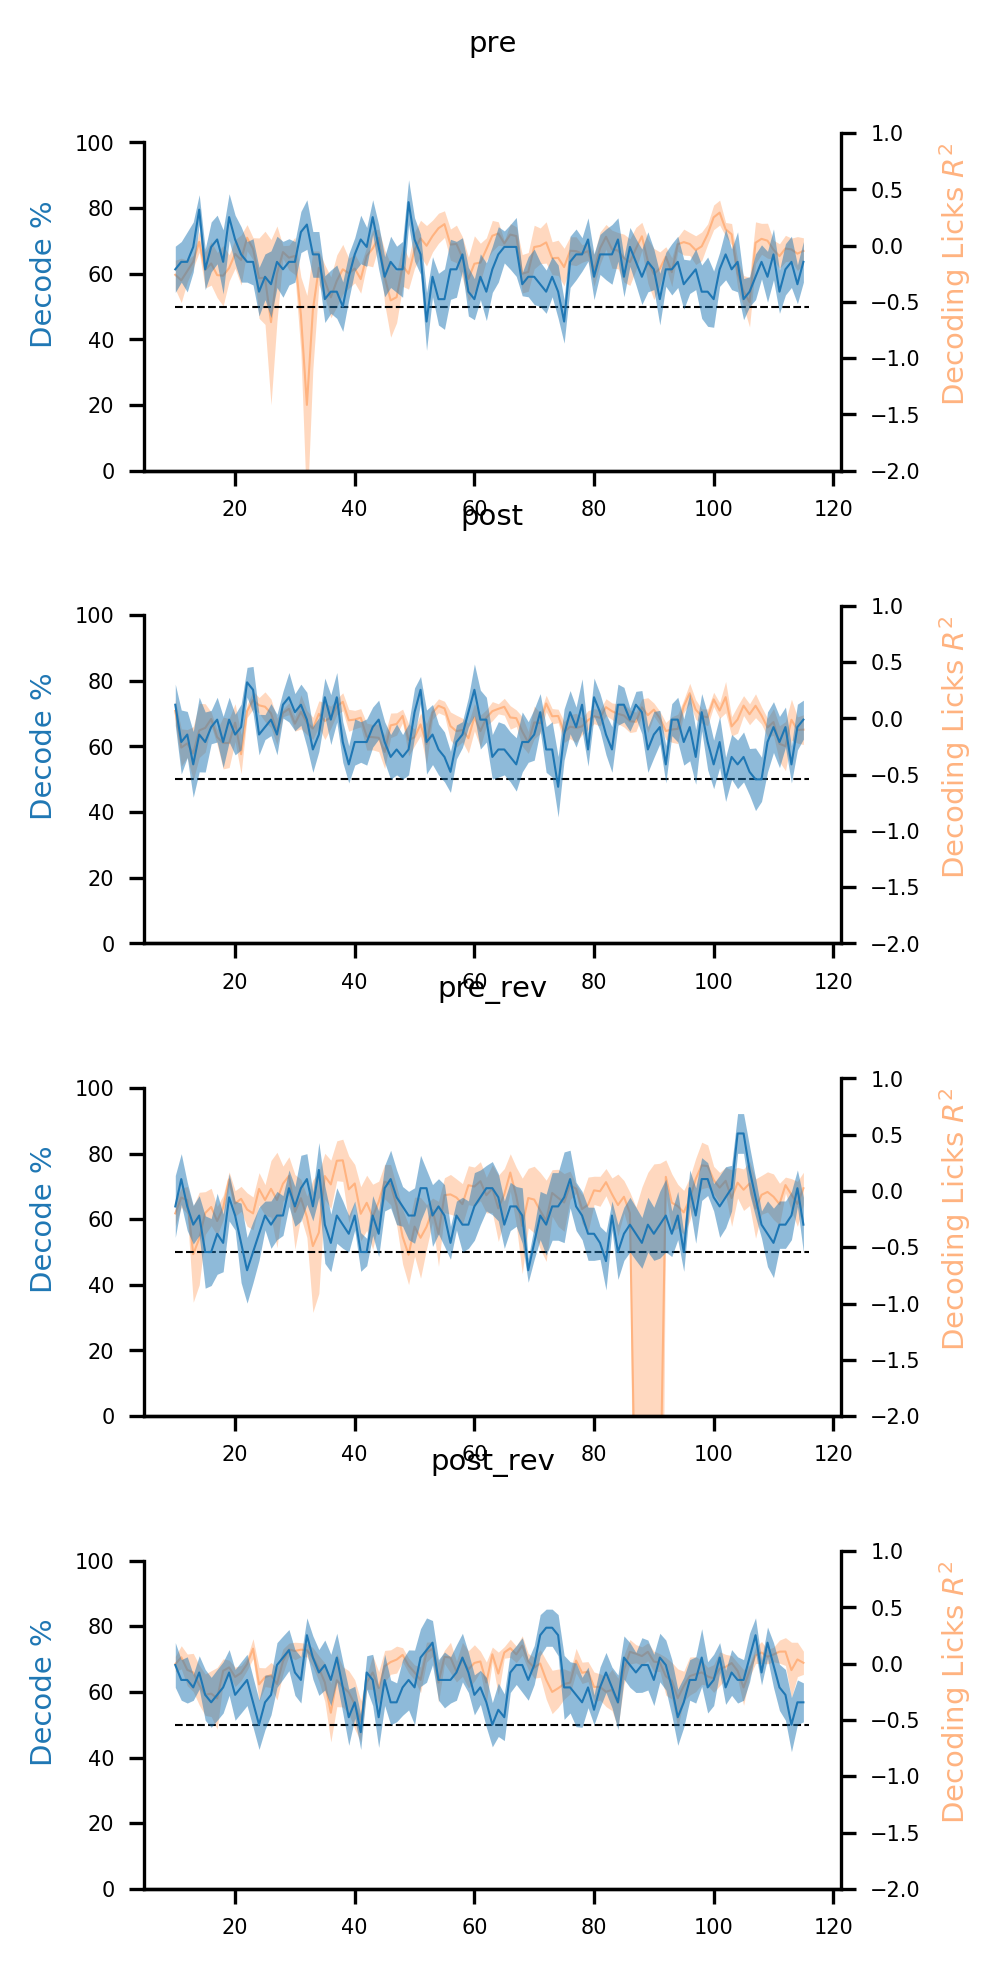

In [59]:
days = ['pre','post','pre_rev','post_rev',]

fig, ax = pl.subplots(len(days), 1, figsize=(3, 8))

count = 0
for day in days:

    what = day
    tstart, tstop = (eval("vars_ts_%s_n_train"%what)[all_animals[0]],
                     len(eval("vars_ts_%s_labels"%what)[all_animals[0]])-eval("vars_ts_%s_n_test"%what)[all_animals[0]])

    pt.plot_shaded(range(tstart, tstop), np.r_[eval("vars_ts_%s_scores"%what).values()].T*100, ax=ax[count])
    # ax.plot(range(tstart, tstop), scores_m, lw=1, color='k')
    # ax.fill_between(range(tstart, tstop), scores_m-scores_s, scores_m+scores_s, lw=0, alpha=0.3, zorder=0, color='k')
    
    ax[count].set_title(day)
    #ax[count].set_xlabel('Trial #')
    ax[count].set_ylabel('Decode %', color='C0')
    ax[count].set_ylim(0, 120)
    ax[count].spines['left'].set_bounds(0, 100)
    ax[count].set_yticks(range(0, 101, 20))
    ax[count].hlines(50, tstart, tstop, linestyles='dashed', color='k', lw=0.5, zorder=0)
    ax[count].set_xlim(0, 120)

    ax2 = ax[count].twinx()
    ax2.spines['left'].set_visible(False)
    pt.plot_shaded(range(tstart, tstop), np.r_[eval("vars_ts_%s_lick_scores"%what).values()].T, ax=ax2,
                   color=(1, 0.7, 0.5))
    ax2.spines['right'].set_visible(True)
    ax2.set_ylabel('Decoding Licks $R^2$', color=(1, 0.7, 0.5))
    ax2.set_ylim(-2, 1.5)
    ax2.set_yticks(np.arange(-2, 1.1, 0.5))
    ax2.spines['right'].set_bounds(-2, 1)

    ax[count].set_zorder(ax2.get_zorder()+1)
    ax[count].patch.set_visible(False)
    count = count+1
fig.savefig('../img/decoding_through_session_%s_allmice.pdf'%what)

In [60]:
save_workspace(db)

Could not store variable 'di'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'sys'. Skipping...
